In [1]:
import os
import pandas as pd
import numpy as np
import sys
import os

def find_and_append_module_path():
    current_dir = os.getcwd()
    substring_to_find = 'statsfaction'
    index = current_dir.rfind(substring_to_find)
    
    if index != -1:
        # Extract the directory path up to and including the last "mypath" occurrence
        new_dir = current_dir[:index + (len(substring_to_find))]

        # Change the current working directory to the new directory
        os.chdir(new_dir)
        sys.path.append(new_dir)
        # Verify the new current directory
        print("New current directory:", os.getcwd())
    else:
        print("No 'mypath' found in the current directory")

find_and_append_module_path()
os.getcwd()


New current directory: c:\Users\Robert\Documents\Projekte\statsfaction


'c:\\Users\\Robert\\Documents\\Projekte\\statsfaction'

In [2]:
from prediction_prime_overall.src.predict import predict_and_explain_players, analyze_individual_ID
from prediction_prime_overall.src.eval import create_polar_plot
import prediction_prime_overall.config as CONFIG

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# Import your group to analyze

In [3]:
sql_prospect = f"""
SELECT min(Age) as potential_age,* FROM  fifa WHERE  FIFA = 2024 and Age < 23 and potential > 70 and overall <90
GROUP BY ID
order by potential DESC;
"""


import pandas as pd
import sqlite3
DATABASE_PATH = "data/sport_analytics/database/football.db"
# Step 1: Establish a database connection
conn = sqlite3.connect(CONFIG.DATABASE)

df_prospect = pd.read_sql_query(sql_prospect, conn)

conn.close()

# Seiten wurden umgestellt und Feld hat jetzt neuen Inhalt
# df_prospect['Position'] = [value.strip() for item in df_prospect["Position"] for value in item.split(',')]
# df_prospect['Position'] = [i.replace(' ',',') for i in df_prospect['Position']]

df_prospect.head()

,potential_age,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Preferred foot,Skill moves,Weak foot,International reputation,Work rate,Body type,Real face,birthDate,league,club_prestige
0,22.0,238794,Vini Jr.,22.0,https://cdn.sofifa.net/players/238/794/24_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,89.0,94.0,Real Madrid,...,None,None,None,None,None,None,None,None,None,None
1,20.0,256790,J. Musiala,20.0,https://cdn.sofifa.net/players/256/790/24_60.png,Germany,https://cdn.sofifa.net/flags/de.png,86.0,93.0,FC Bayern München,...,None,None,None,None,None,None,None,None,None,None
2,20.0,251854,Pedri,20.0,https://cdn.sofifa.net/players/251/854/24_60.png,Spain,https://cdn.sofifa.net/flags/es.png,86.0,92.0,FC Barcelona,...,None,None,None,None,None,None,None,None,None,None
3,22.0,247635,K. Kvaratskhelia,22.0,https://cdn.sofifa.net/players/247/635/24_60.png,Georgia,https://cdn.sofifa.net/flags/ge.png,86.0,92.0,Napoli,...,None,None,None,None,None,None,None,None,None,None
4,20.0,256630,F. Wirtz,20.0,https://cdn.sofifa.net/players/256/630/24_60.png,Germany,https://cdn.sofifa.net/flags/de.png,86.0,91.0,Bayer 04 Leverkusen,...,None,None,None,None,None,None,None,None,None,None


In [4]:
sum(df_prospect.ID == 230621)

0

In [5]:
df_prospect.Positioning

0       87.0
1       81.0
2       79.0
3       84.0
4       80.0
        ... 
4069    23.0
4070    61.0
4071    64.0
4072    58.0
4073    29.0
Name: Positioning, Length: 4074, dtype: float64

## Choose a from a Set of trained models

In [12]:
import pickle
NAME = "offense_potential_forward_min_pot_min_prime"
ACTUAL_MODEL = "offense_potential_forward_general_age"
with open(f"{CONFIG.MODELS}/{NAME}.pkl", "rb") as file:
    loaded_object = pickle.load(file)

chosen_object = loaded_object[ 'Gradient Boosting Regressor']
model = chosen_object['Model']
scaler = chosen_object['Scaler']
attributes = chosen_object['attributes']
explainer = chosen_object['explainer']
print(chosen_object['Classification Report'])
# print(chosen_object['AUC'])

              precision    recall  f1-score   support

       False       0.98      0.99      0.99       375
        True       0.00      0.00      0.00         6

    accuracy                           0.98       381
   macro avg       0.49      0.50      0.49       381
weighted avg       0.97      0.98      0.97       381



In [13]:
model.feature_names_in_

array(['Finishing', 'Composure', 'Interceptions', 'Age', 'Volleys',
       'Dribbling', 'Agility', 'ShotPower', 'Strength', 'Positioning',
       'Vision', 'HeadingAccuracy'], dtype=object)

# Analyze individual Players

pred [82.3575121]
[(251852, 'K. Adeyemi', 2024)]


100%|██████████| 1/1 [00:03<00:00,  3.23s/it]


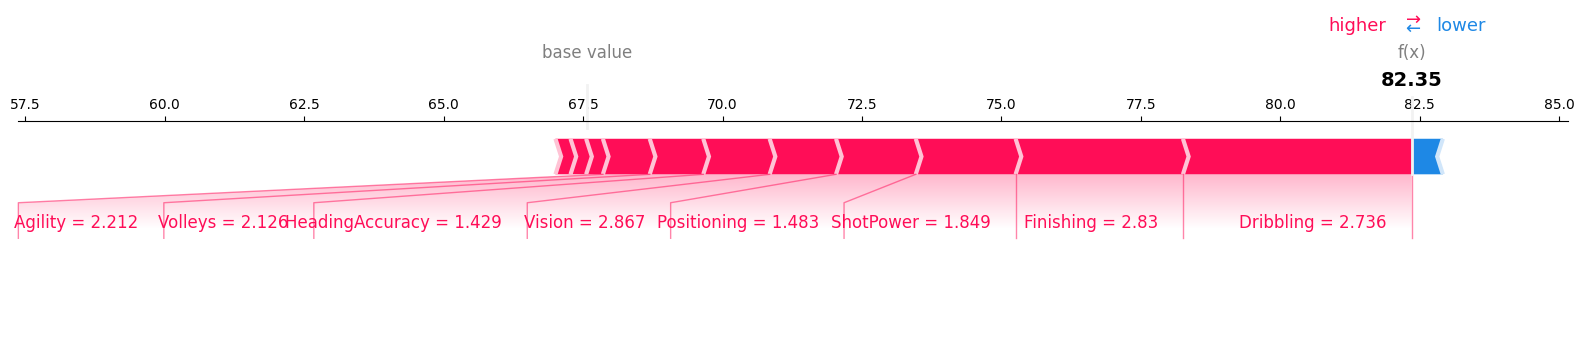

                (251852, K. Adeyemi, 2024)  shap
Finishing                             80.0  3.00
Composure                             76.0  0.27
Interceptions                         31.0  0.30
Age                                   21.0 -0.56
Volleys                               71.0  0.96
Dribbling                             82.0  4.10
Agility                               88.0  0.84
ShotPower                             76.0  1.79
Strength                              66.0  0.28
Positioning                           77.0  1.43
Vision                                72.0  1.19
HeadingAccuracy                       70.0  1.19


Finishing           0.20
Composure           0.02
Interceptions       0.02
Volleys             0.06
Dribbling           0.27
Agility             0.05
Shot Power          0.12
Strength            0.02
Positioning         0.09
Vision              0.08
Heading Accuracy    0.08
Name: shap, dtype: float64

In [14]:
ID = 251852

player = analyze_individual_ID(ID = ID	,df_raw=df_prospect,attributes=attributes,model = model,scaler=scaler,explainer= explainer)
player.rename(index=CONFIG.plot_feature_mapping, inplace=True)


pos_skills = player.shap[player.shap>0]
np.round(pos_skills/pos_skills.sum(),2)

pred [76.99113984]
[(268421, 'M. Tel', 2024)]


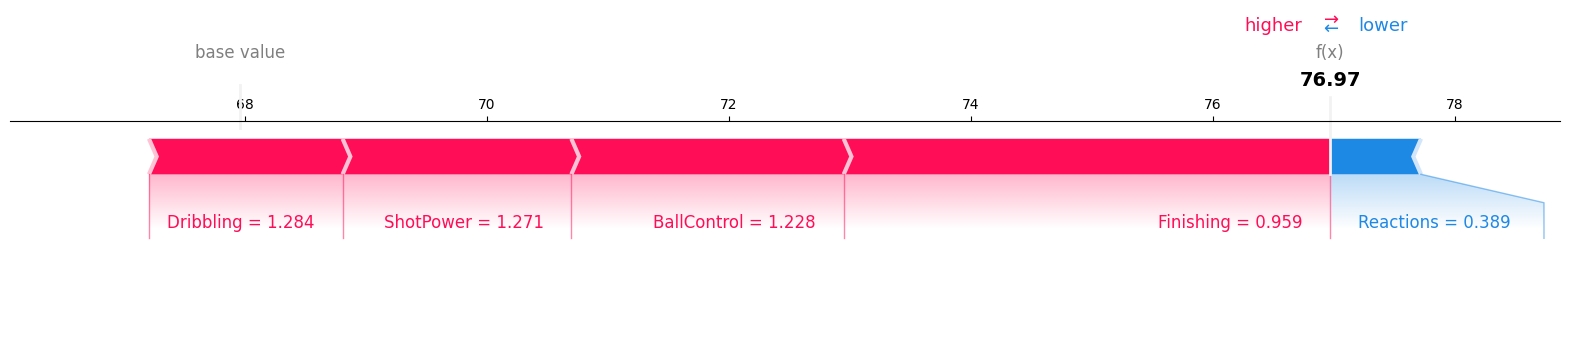

            (268421, M. Tel, 2024)  shap
Finishing                     74.0  4.02
Dribbling                     77.0  1.60
BallControl                   76.0  2.25
Reactions                     60.0 -0.75
ShotPower                     79.0  1.89


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


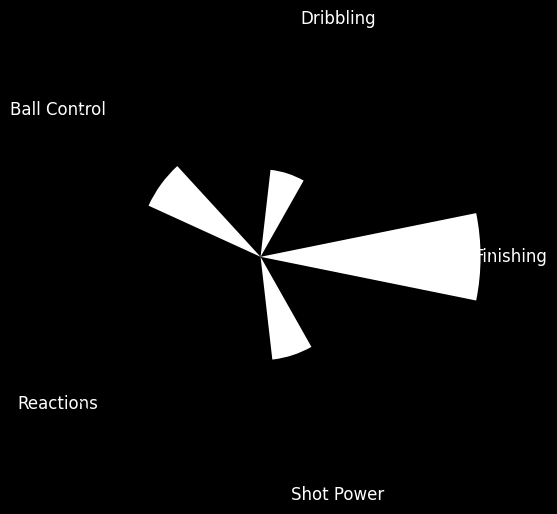

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [81.91817325]
[(259399, 'R. Højlund', 2024)]


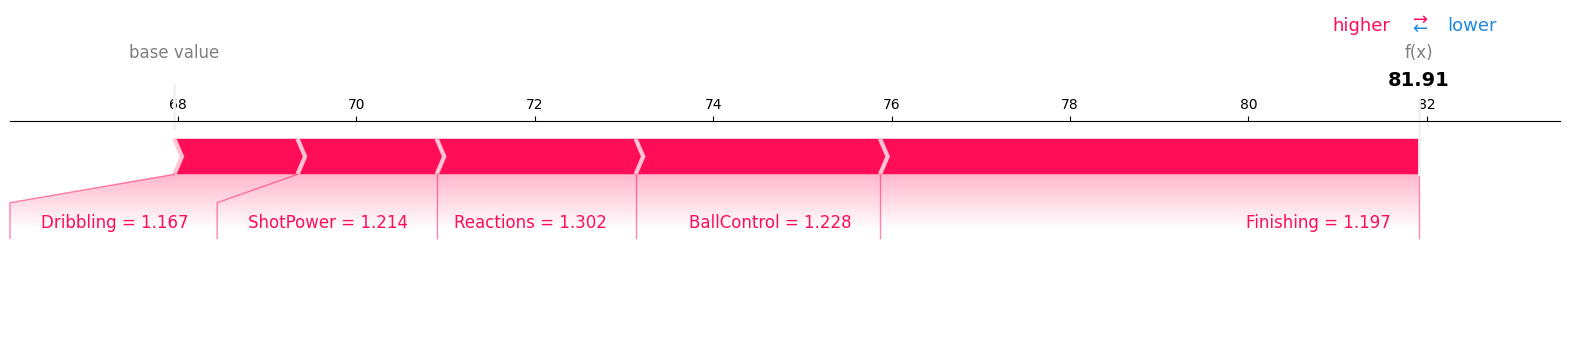

            (259399, R. Højlund, 2024)  shap
Finishing                         78.0  6.04
Dribbling                         75.0  1.38
BallControl                       76.0  2.74
Reactions                         75.0  2.23
ShotPower                         78.0  1.56


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


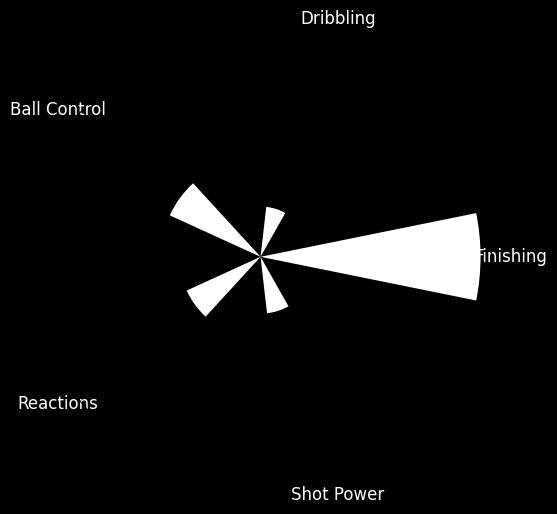

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [81.91817325]
[(240833, 'Y. Moukoko', 2024)]


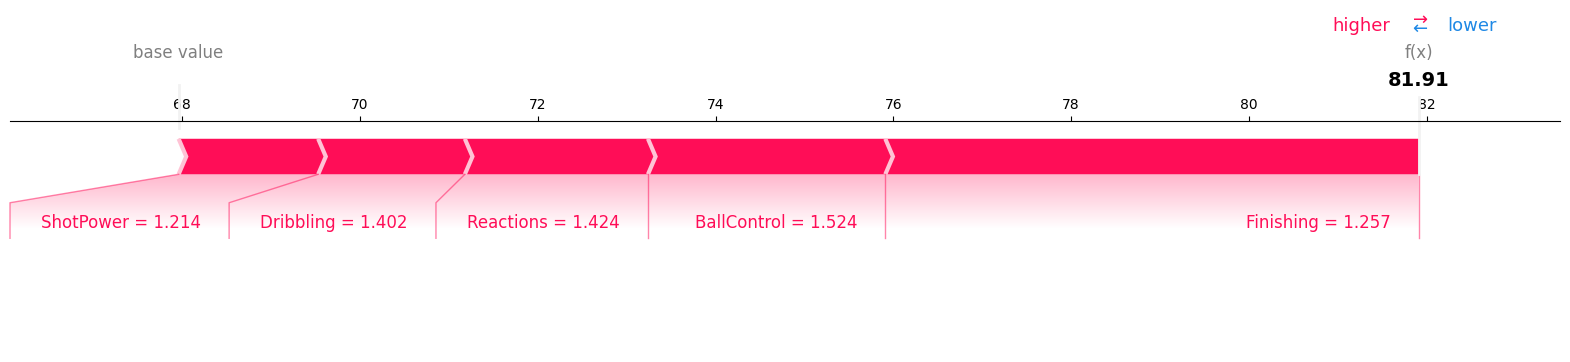

            (240833, Y. Moukoko, 2024)  shap
Finishing                         79.0  6.00
Dribbling                         79.0  1.65
BallControl                       81.0  2.67
Reactions                         77.0  2.06
ShotPower                         78.0  1.57


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


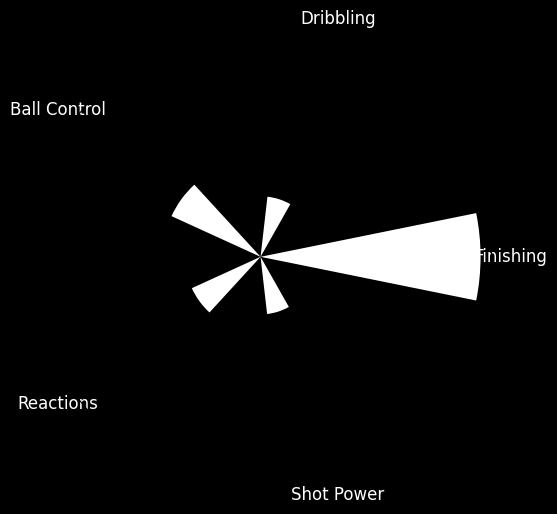

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [82.9545027]
[(251852, 'K. Adeyemi', 2024)]


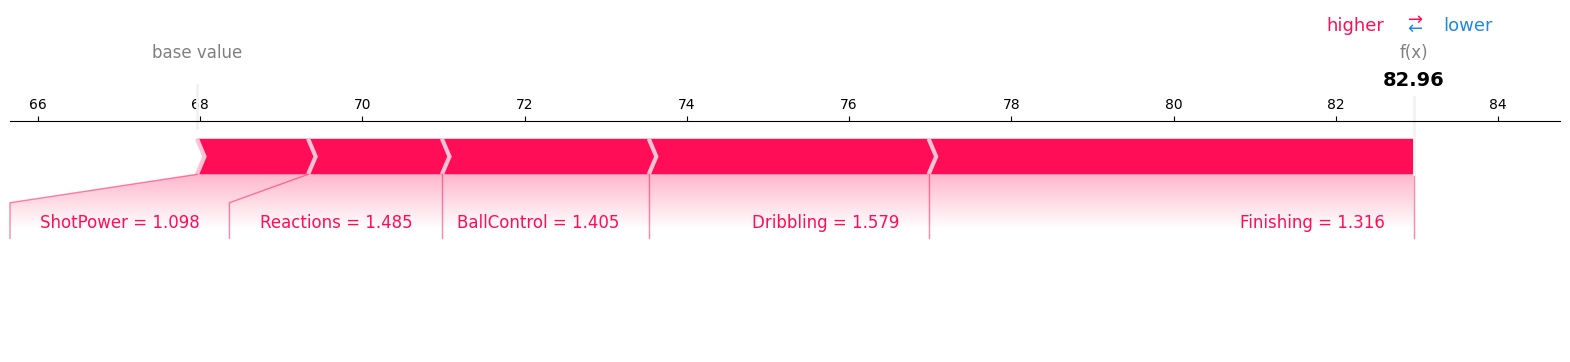

            (251852, K. Adeyemi, 2024)  shap
Finishing                         80.0  5.98
Dribbling                         82.0  3.45
BallControl                       79.0  2.55
Reactions                         78.0  1.65
ShotPower                         76.0  1.37


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


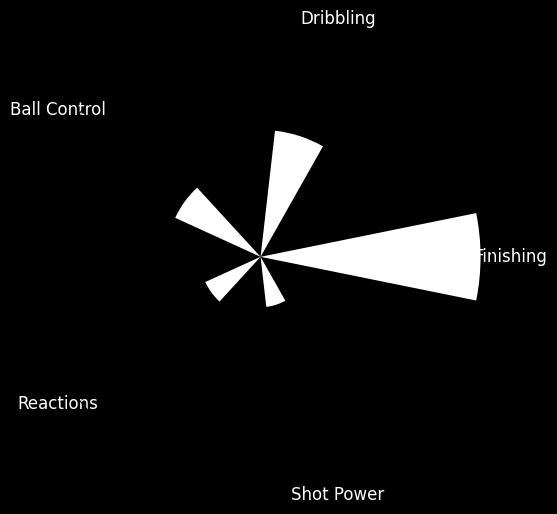

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [73.45115484]
[(256658, 'J. Ngankam', 2024)]


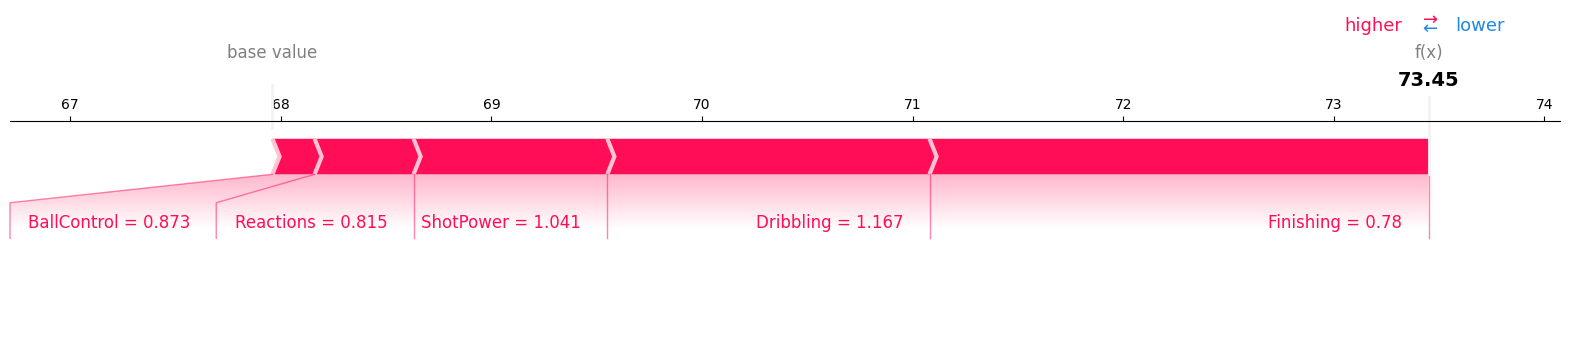

            (256658, J. Ngankam, 2024)  shap
Finishing                         71.0  2.37
Dribbling                         75.0  1.53
BallControl                       70.0  0.20
Reactions                         67.0  0.47
ShotPower                         75.0  0.92


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


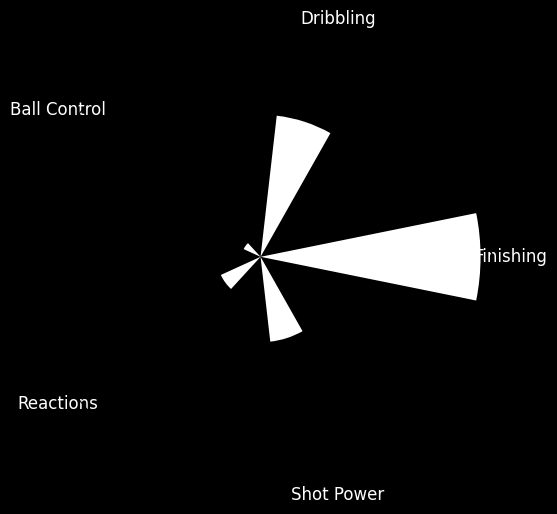

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [86.54915487]
[(256790, 'J. Musiala', 2024)]


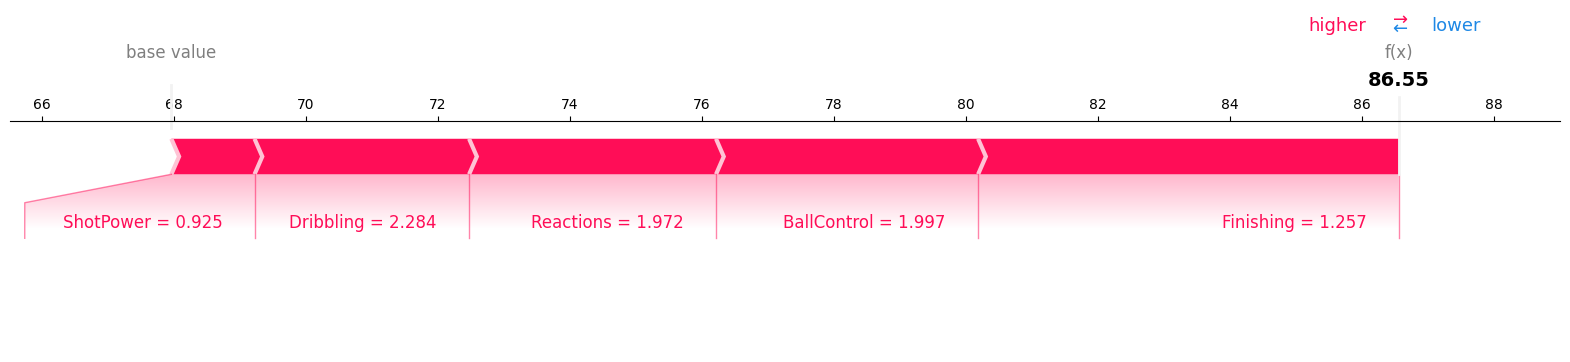

            (256790, J. Musiala, 2024)  shap
Finishing                         79.0  6.37
Dribbling                         94.0  3.25
BallControl                       89.0  3.97
Reactions                         86.0  3.74
ShotPower                         73.0  1.26


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


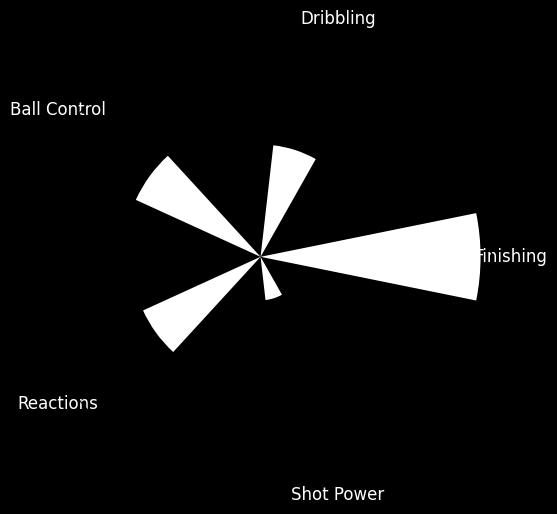

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################


In [9]:
for ID in [268421,259399,240833,251852,256658,256790]:
    player = analyze_individual_ID(ID = ID	,df_raw=df_prospect,attributes=attributes,model = model,scaler=scaler,explainer= explainer)
    player.rename(index=CONFIG.plot_feature_mapping, inplace=True)
    create_polar_plot(player['shap'], positive_color= "white", negative_color='black')
    
    print("-"*150)
    print("#"*150)

# Data Analysis

In [10]:
test = explainer.shap_values(df_prospect[explainer.data_feature_names].iloc[0:5])

AttributeError: 'TreeExplainer' object has no attribute 'data_feature_names'

In [ ]:
len(explainer.data_feature_names)

In [ ]:
import pickle

with open(f"{CONFIG.MODELS}/offense_potential_attacking_midfielder_age.pkl", "rb") as file:
    loaded_object = pickle.load(file)

chosen_object = loaded_object[ 'Huber Regression']
model = chosen_object['Model']
scaler = chosen_object['Scaler']
attributes = chosen_object['attributes']
explainer = chosen_object['explainer']
print(chosen_object['Classification Report'])
# print(chosen_object['AUC'])

from config import plot_feature_mapping

for ID in [251854,256630,256790,251852]:
    player = analyze_individual_ID(ID = ID	,df_raw=df_prospect,attributes=attributes,model = model,scaler=scaler,explainer= explainer)
    player.rename(index=plot_feature_mapping, inplace=True)
    create_polar_plot(player['shap'], positive_color= "#5a7b6c", negative_color='#e34234')
    
    print("-"*150)
    print("#"*150)